![imagen](../../../imagenes/seaborn.png)


# Exploratory Data Analysis with Seaborn

Tras haber visto los fundamentos del EDA y haber realizado un extenso viaje por la librería Matplotlib, vamos a complementar todo esto con la librería Seaborn, una librería de representación cada día más utilizada y que nos permitirá realizar gráficos muy interesantes que nos servirán como complemento de lo ya visto con anterioridad. Además, la idea es poder recorrer este camino con ejemplos de cómo se debería utilizar un gráfico o pequeños tips sobre las situaciones más favorables para utilizar un tipo de gráficos u otro.

Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), ya que, en primer lugar, es imposible abarcarlo todo, y en segundo lugar, porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, lo primero que tendremos que identificar es el tipo de los datos y cuántas variables vamos a representar
- Una varibale numérica
- Una variable categórica
- Dos variables numércias
- Tres o más variables numércias
- Dos variablees categóricas
- Variables numéricas y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas como es [este](https://www.data-to-viz.com/), lo tendremos mucho más fácil.



In [2]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Aumentamos el número de filas de los DataFrames de Pandas en el Notebook
sns.set(color_codes=True) # Editamos el tema de la librería de Seaborn

# Filtramos todos aquellos mensajes de advertencia que no sean realmente un problema:Zz
import warnings
warnings.filterwarnings("ignore")

Ahora, importaremos diferentes datasets para hacer nuestras representaciones:

In [3]:
# Cargamos las features en un DataFrame:
iris_df = pd.DataFrame(load_iris()["data"], columns=load_iris()["feature_names"])
boston_df = pd.DataFrame(load_boston()["data"], columns=load_boston()["feature_names"])

# Y añadimos la columna de especies:
iris_df["target"] = load_iris()["target_names"][load_iris()["target"]]
boston_df["target"] = load_boston()["target"]

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("../../../data/titanic.csv", sep="\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("../../../data/supermarket_sales.csv")

# Cargamos dataset de suicidios
suicid_df = pd.read_csv("../../../data/suicide.csv")

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:

![imagen](../../../imagenes/dtypes.png)

**Variables cualitativas**: son todas aquellas variables que expresan una cualidad, característica o modalidad.
  - **Ordinales**: pueden tomar diferentes valores que podemos ordenar según una escala prestablecida.
  - **Nominales**: son aquellas variables que no pueden ser ordenadas en base a ninguna escala de manera natural.

**Variables cuantitativas**: son todas aquellas variables que podemos contabilizar, es decir, definir con un número, lo que a su misma vez implica que podamos realizar cálculos aritméticos con ella.
  - **Continuas**: son aquellas variables que pueden tomar infinitos valores entre 2 valores dados.
  - **Discretas**: pueden tomar un número finito de valores entre dos dados.



A continuación, vamos a hacer un repaso de las gráficas más utilizadas con ejemplos basados en los datasets que hemos importado anteriormente:

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Este tipo de gráficas nos sirven para ver la distribución de los datos, dónde se concentran más, si es dispersa, si tiene asimetrías, si tiene outliers, entre otros.

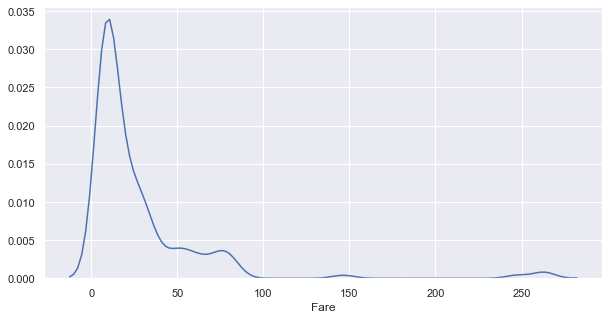

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'], hist=False);

#### Histograma
También podemos verlo en un histograma

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad anterior. La diferencia es que ahora el eje ``Y`` es un conteo y no la probabilidad de aparición de los valores de la variable.

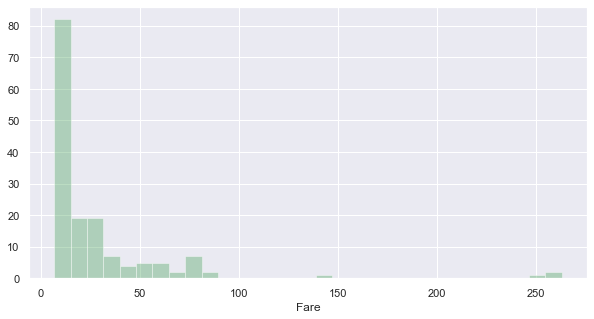

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'],
            kde=False,
            color='g');

Podemos agrupar (visualmente) una variable numérica. Podría ser una posible categorización de los billetes

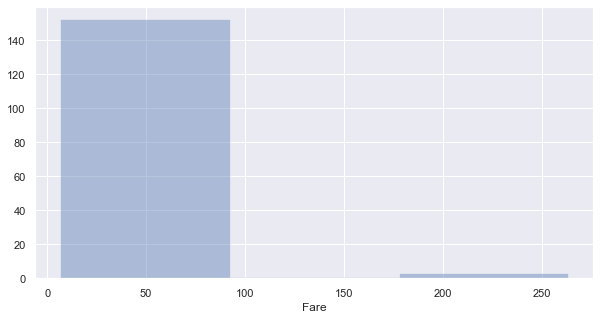

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'],
            kde=False,
            bins=3);

#### Histograma + Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

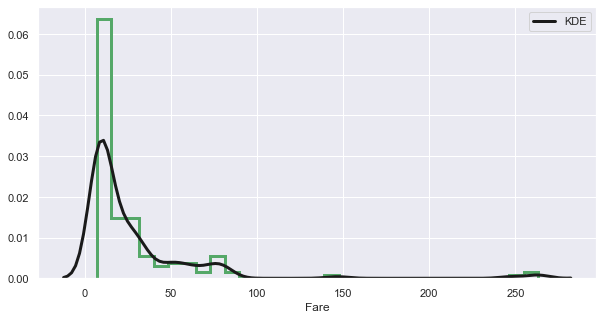

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"});

Otra manera muy visual de ver la concentración de los valores es mediante el argumento `rug`

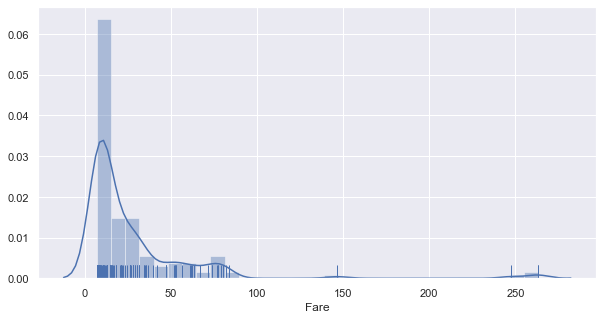

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            rug=True);

#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

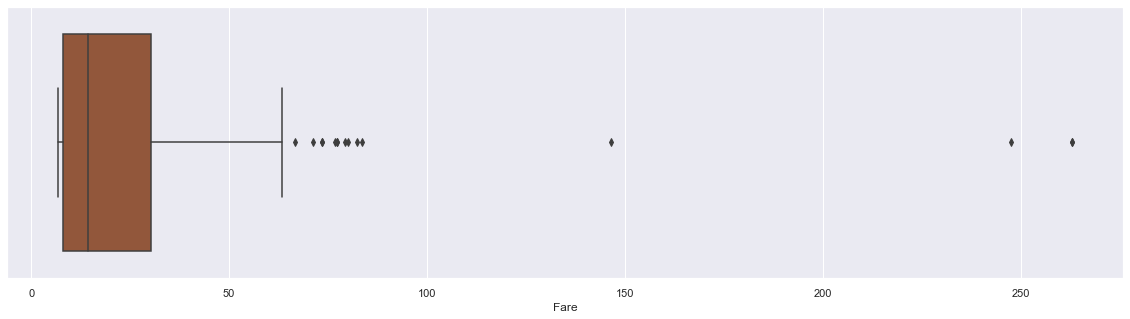

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(titanic_df['Fare'], color='sienna');

![imagen](../../../imagenes/boxplot.png)

#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja. No es la función de desnidad como tal sino una estimación de la densidad.

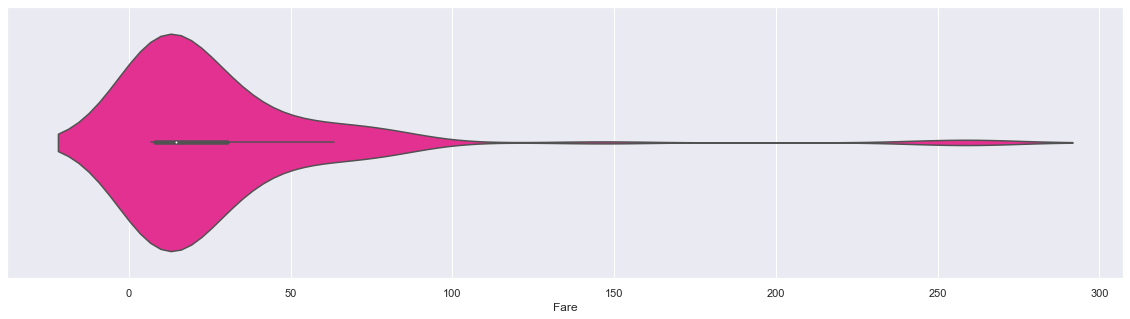

In [40]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df['Fare'], color='deeppink');

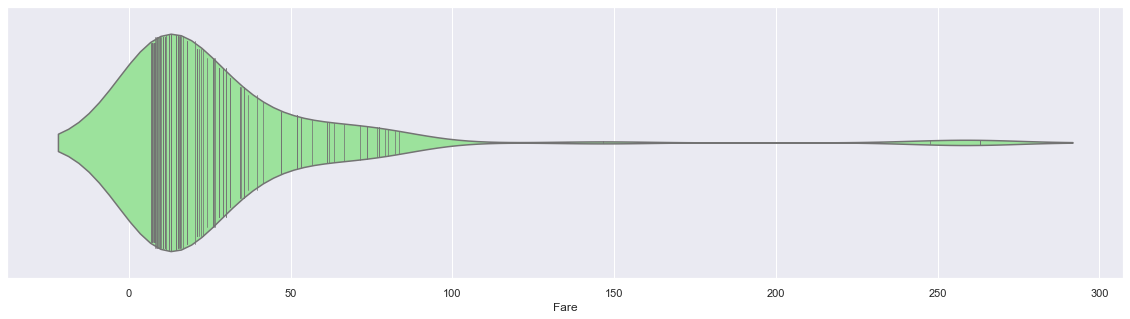

In [41]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df['Fare'],
               color='lightgreen',
              inner='stick');

#### EJERCICIO

1. Repite los 3 tipos de gráficos que acabamos de ver para alguna de las variables del dataframe ``market_df`` en las que tenga sentido usar este tipo de gráficos:

In [18]:
market_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente en el Titanic.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

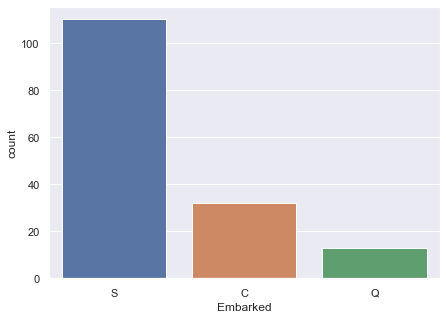

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(titanic_df['Embarked']);

#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

In [21]:
conteo = market_df['Product line'].value_counts(ascending=True)
conteo

Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    170
Food and beverages        174
Fashion accessories       178
Name: Product line, dtype: int64

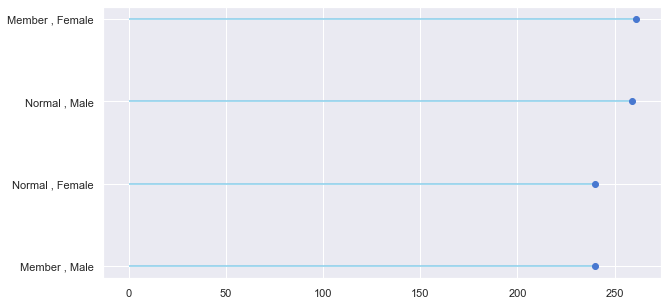

In [458]:
plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=0,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "bo");
# plt.plot(np.zeros(len(conteo)), conteo.index, "go");


#### Gráficos de tarta y donut

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

Para estos gráficos vamos a volver sobre los tipos de embarque del Titanic.

In [432]:
data = titanic_df['Embarked'].value_counts(ascending=False)
data

S    110
C     32
Q     13
Name: Embarked, dtype: int64

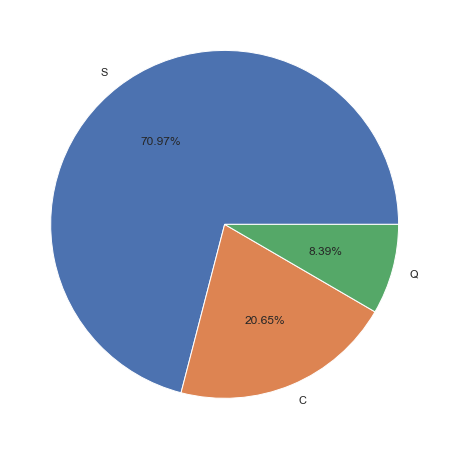

In [437]:
# Gráfico de tarta:
plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%'
       )
plt.show()

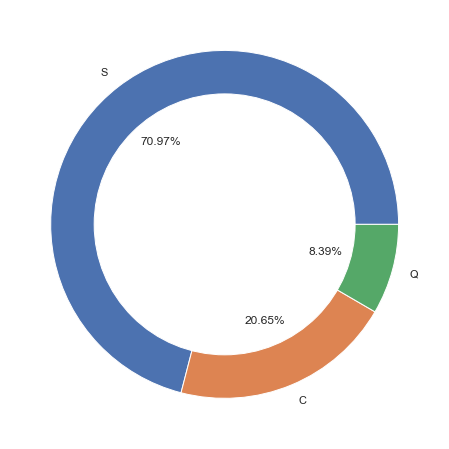

In [468]:
# Cremos un círculo para el centro de la gráfica:
my_circle=plt.Circle( (0,0), 0.75, color='white')

fig = plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
fig.gca().add_artist(my_circle)
plt.show()


### EJERCICIO

1. Haz un gráfico de estilo lollipop que muestre el conteo de cada una de las formas de pago (Payment) en el dataframe ``market_df``
2. Basándote en ese mismo dataframe, haz una represenación simple del conteo (countplot) de hombres o mujeres en función del tipo de cliente que son, es decir, tendrás que representar tantas barras como combinaciones posibles existan (que serán 4, 2 por cada columna) 

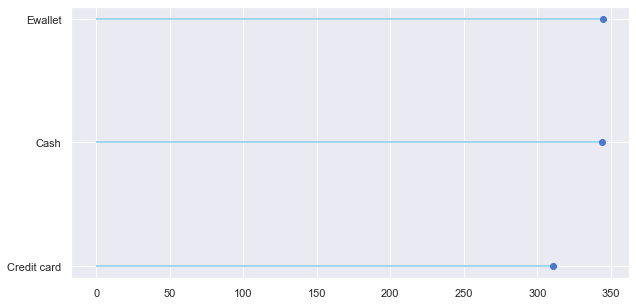

In [460]:
# 1.
conteo = market_df['Payment'].value_counts(ascending=True)
conteo
plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=0,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "bo");

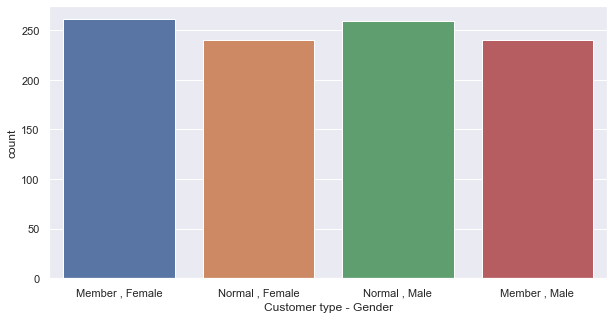

In [454]:
# 2.
plt.figure(figsize=(10, 5))
market_df2 = market_df.copy()
market_df2['Customer type - Gender'] = market_df2['Customer type'] + " , " + market_df2['Gender']
conteo = market_df2['Customer type - Gender'].value_counts(ascending=True)
sns.countplot(market_df2['Customer type - Gender']);

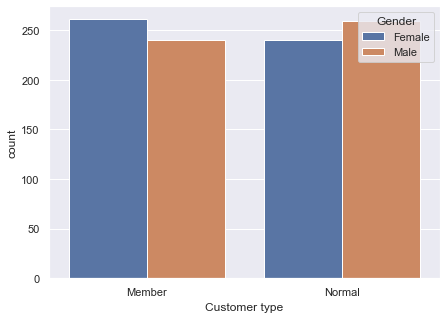

In [457]:
plt.figure(figsize=(7,5))
sns.countplot(market_df['Customer type'], hue = market_df['Gender']);

### EJERCICIO

1. Haz un gráfico de tarta para representar los porcentajes de habitantes en las diferentes ciudades que aparecen en el dataframe ``market_df``. Asumiremos que cada registro del dataframe es un cliente diferente.
2. La información que has obtenido en el apartado, quedaría más completa si nos creamos otro gráfico. En este caso, crea un gráfico de donut donde muestre los porcentajes de cada línea de producto para los habitantes de *Yangon*.

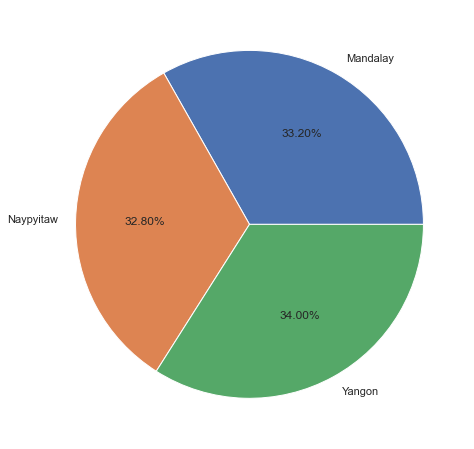

In [469]:
city_mkdf = market_df.groupby('City')['City'].count()

fig = plt.figure(figsize=(8,8))
plt.pie(city_mkdf.values,
        labels=city_mkdf.index,
        autopct='%1.2f%%')
plt.show()

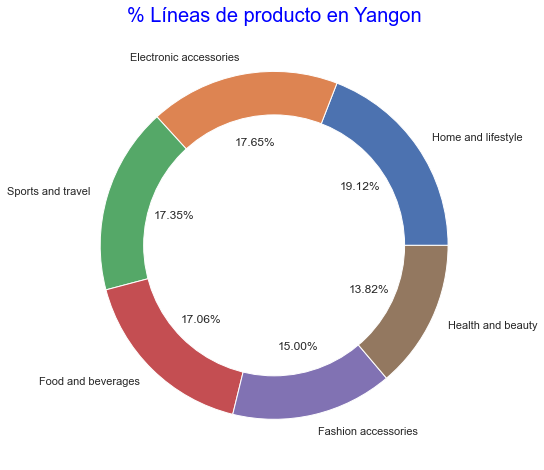

In [473]:
# 2.
data2 = market_df2[market_df2['City'] == 'Yangon']
data2_1 = data2['Product line'].value_counts(ascending=False)
my_circle=plt.Circle( (0,0), 0.75, color='white')
font = {'family': 'arial',
        'color':  'blue',
        'weight': 'normal',
        'size': 20,
        }
fig = plt.figure(figsize=(8,8))
plt.pie(data2_1.values,
        labels=data2_1.index,
        autopct='%1.2f%%')
fig.gca().add_artist(my_circle)
plt.title('% Líneas de producto en Yangon', fontdict = font)
plt.show()

## 2. Análisis de múltiples variables
### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot (varias variables)

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [482]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


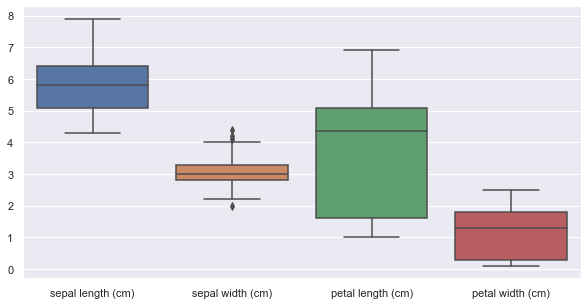

In [483]:
plt.figure(figsize=(10,5))
sns.boxplot(data=iris_df);
# sns.boxplot(data=iris_df[['sepal width (cm)', 'petal width (cm)']]);

El boxplot está bien, pero hay algo de información que se nos escapa

(150, 5)

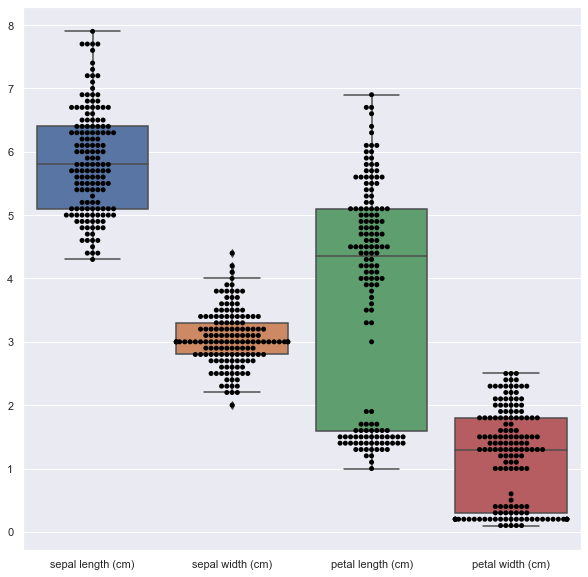

In [485]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])
sns.swarmplot(data=iris_df[iris_df.columns.values[0:4]],
             color="black");
iris_df.shape

#### Diagramas de densidad (bivariable)

Otra manera de ver cómo se distribuyen las características de las flores.

[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')

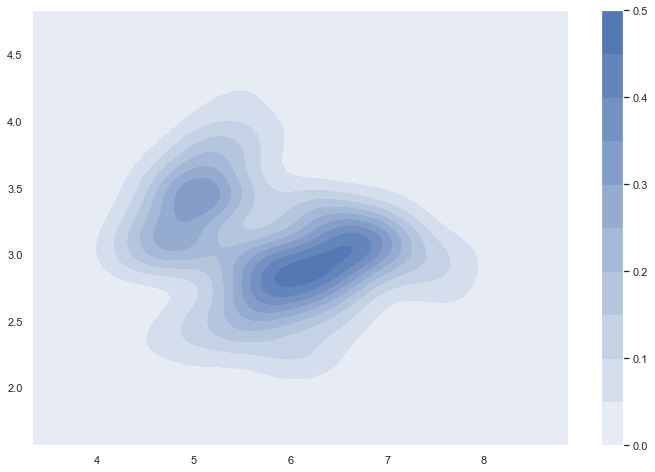

In [491]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=iris_df[iris_df.columns.values[0:2]],
           shade=True, cbar=True);
iris_df.columns[:2]

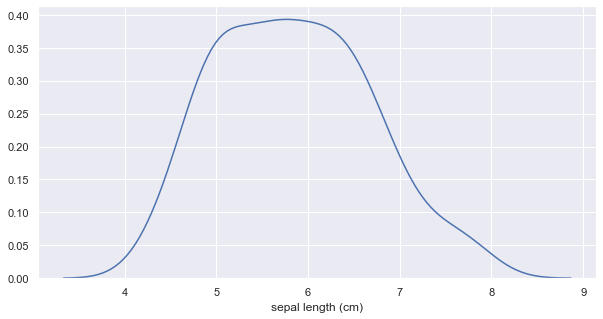

In [487]:
plt.figure(figsize=(10,5))
sns.distplot(iris_df[iris_df.columns.values[0]], hist=False);
# sns.distplot(iris_df[iris_df.columns.values[1]], hist=False);

#### Histogramas y comparativas de funciones de densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

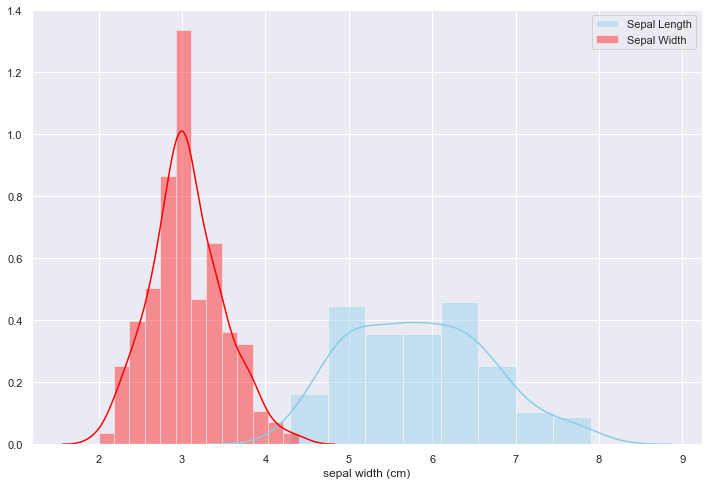

In [494]:
plt.figure(figsize=(12,8))
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", label="Sepal Length")
sns.distplot(iris_df["sepal width (cm)"] , color="red", label="Sepal Width")
plt.legend();

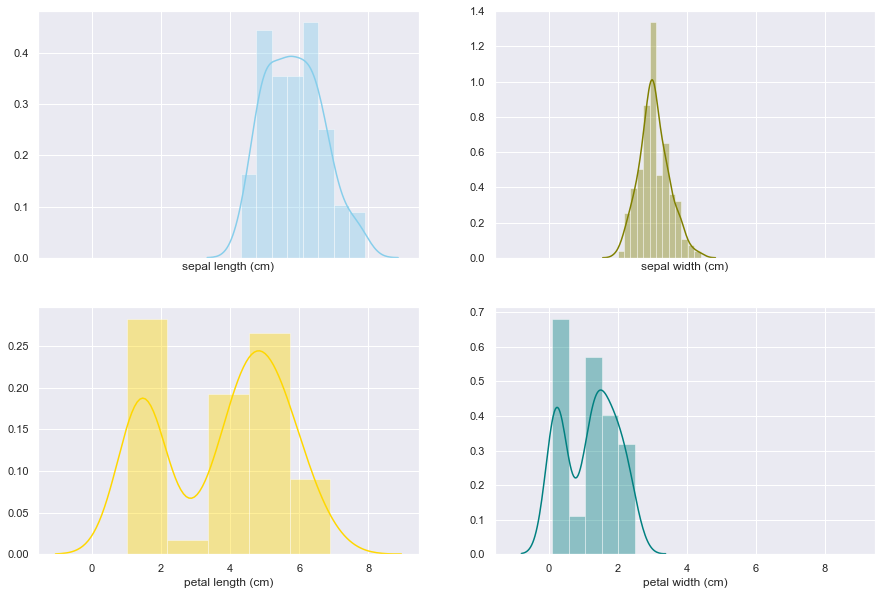

In [68]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", ax=axes[0, 0])
sns.distplot(iris_df["sepal width (cm)"] , color="olive", ax=axes[0, 1])
sns.distplot(iris_df["petal length (cm)"] , color="gold", ax=axes[1, 0])
sns.distplot(iris_df["petal width (cm)"] , color="teal", ax=axes[1, 1]);

### EJERCICIO

1. Representa, tomando como referencia el dataset ``market_df``, los histogramas de las variables ``'Unit price', 'gross income' y 'Rating'`` en una misma gráfica.


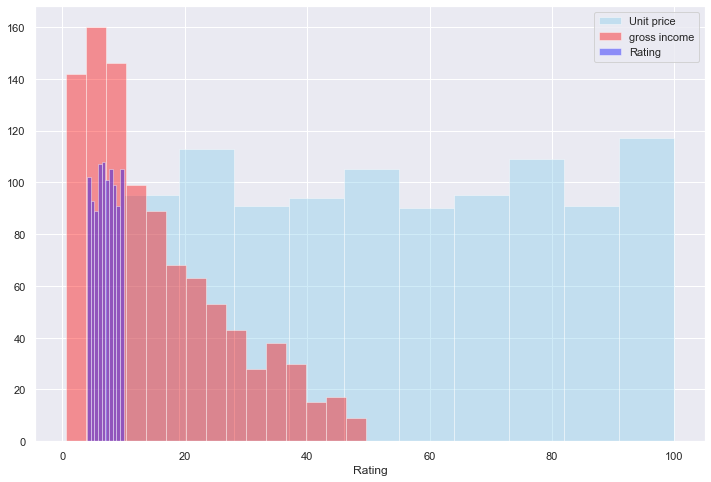

In [495]:
plt.figure(figsize=(12,8))
sns.distplot(market_df["Unit price"], kde=False, color="skyblue", label="Unit price")
sns.distplot(market_df["gross income"], kde=False, color="red", label="gross income")
sns.distplot(market_df["Rating"], kde=False, color="blue", label="Rating")
plt.legend();

##### EXTRA

2. Representa las funciones de densidad de las variables anteriores en 3 gráficas, que se distribuirán 2 arriba (ocupando el mismo tamaño) y una abajo (ocupando el ancho de las 2 de arriba). Además, las gráficas de arriba deberán compartir el eje y. Para hacer esto, puedes recurrir al apartado ``plt.GridSpec:-Complicando-aún-más-las-visualizaciones`` del notebook [13_Subplots](../01_Matplotlib/13_Subplots.ipynb#plt.GridSpec:-Complicando-aún-más-las-visualizaciones) de la carpeta de Matplotlib, donde se usa el grid para seleccionar ejes de tamaños variables (mira el ejemplo de ese apartado).

  Una vez tengas los ejes, podrás usarlos como parámetro de la función, al igual que vimos con las univariantes.

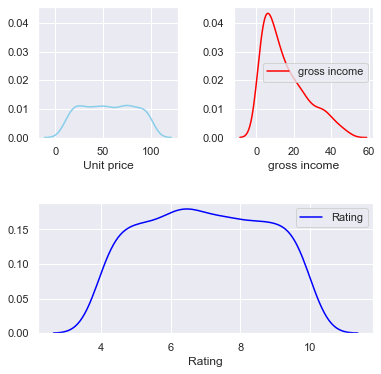

In [508]:
# Establecemos los ejes mediante un gridspec:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(2, 2, hspace=0.5, wspace=0.4)

ax_1 = fig.add_subplot(grid[0, 0])
ax_2 = fig.add_subplot(grid[0, 1], sharey=ax_1)
ax_3 = fig.add_subplot(grid[1, :2])

sns.distplot(market_df["Unit price"], hist=False, color="skyblue", ax=ax_1)
sns.distplot(market_df["gross income"], hist=False, color="red", label="gross income", ax=ax_2)
sns.distplot(market_df["Rating"], hist=False, color="blue", label="Rating", ax=ax_3)

#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

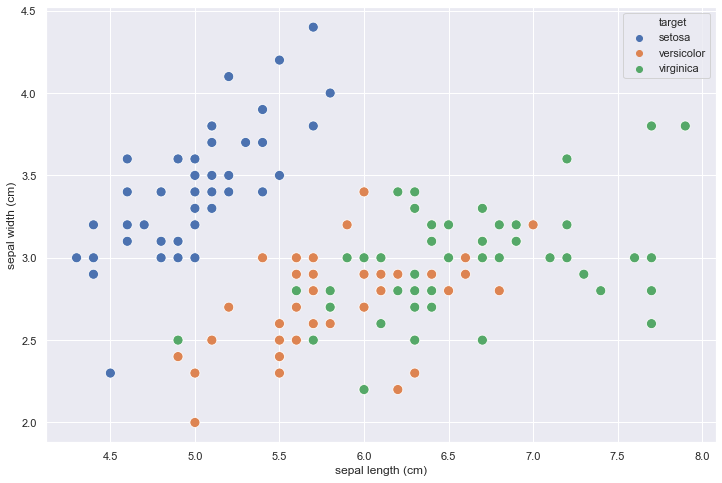

In [511]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = iris_df["sepal length (cm)"],
                y = iris_df["sepal width (cm)"],
                s=100,
                hue=iris_df['target']
               );

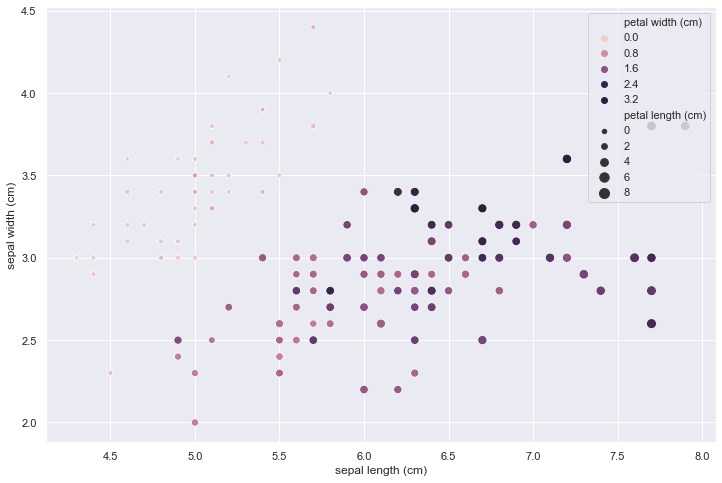

In [518]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=iris_df, 
    x="sepal length (cm)", 
    y="sepal width (cm)", 
    size="petal length (cm)", 
    hue="petal width (cm)",
    sizes=(20, 100)
)

#### Jointplot

Vamos a trabajar ahora sobre el dataframe de Boston:

[Documentación dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

Y lo haremos con el gráfico ``jointplot``, que nos mezcla el análisis univariante con el bivariante:

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

Vamos a comparar el porcentaje de personas de clase trabajadora de baja cualificación en el vecindario (LSTAT) frente a la media de habitaciones por vivienda

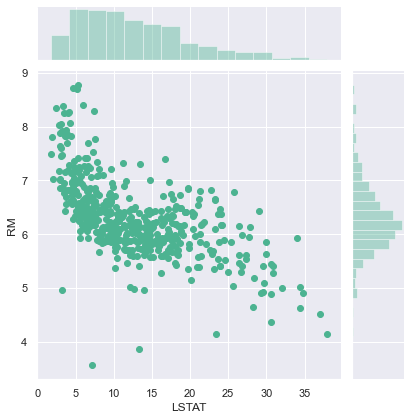

In [87]:
sns.jointplot(x = boston_df['LSTAT'],
             y = boston_df['RM'],
             color='#4CB391');

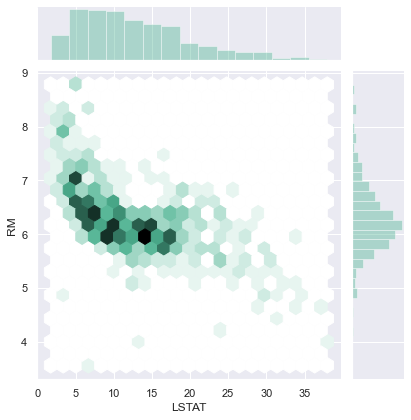

In [86]:
sns.jointplot(x = boston_df['LSTAT'],
             y = boston_df['RM'],
              kind = 'hex',
             color='#4CB391');

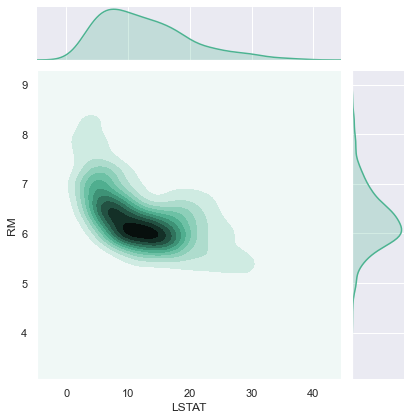

In [290]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="kde",
              color="#4CB391");

### EJERCICIO

1. Échale un vistazo al dataframe del Titanic, identifica las 2 variables cuantitativas que más sentido tenga analizar, y haz una representación donde aparezca un gráfico de dispersión de ambas, pero en la que también aparezcan sus histogramas de forma individual.

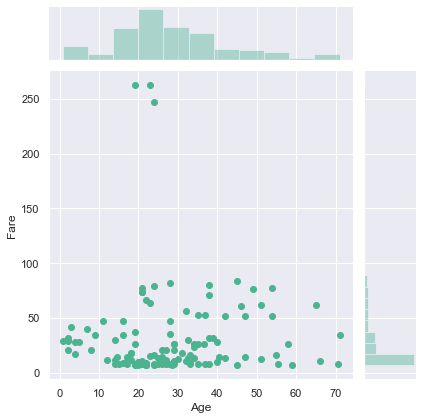

In [521]:
sns.jointplot(x = titanic_df['Age'],
             y = titanic_df['Fare'],
             color='#4CB391');

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [522]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


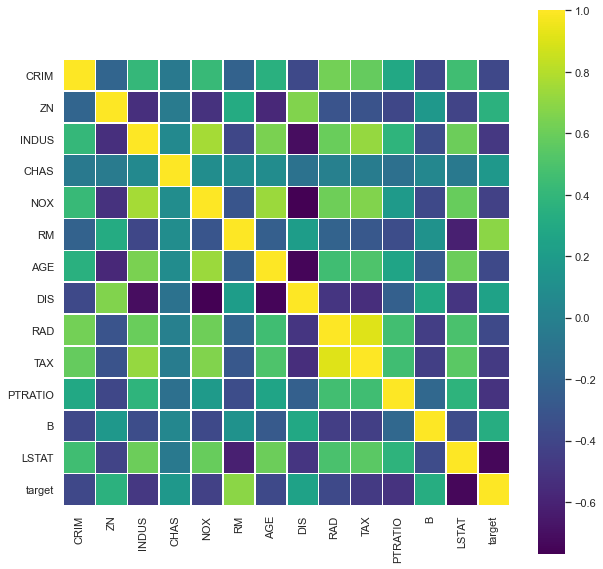

In [528]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),
           cmap=plt.cm.viridis,
           linewidths=.5,
           square=True);

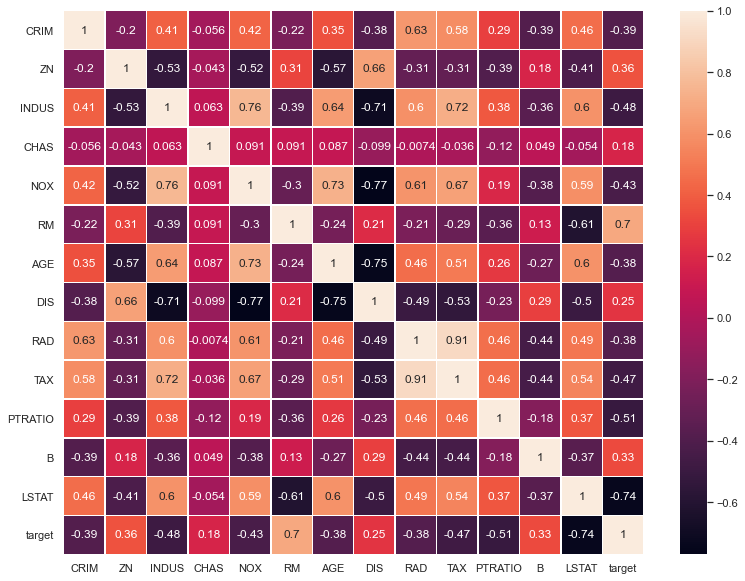

In [121]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(boston_df.corr(),
           annot=True,
           linewidth=.5);

También nos permite comparar una variable numérica vs dos variables categóricas. Por ejemplo la cantidad de suicidios desagregado por edades y paises.

Se recomienda que las dos variables categóricas tengan pocos casos, porque sino no se va a ver bien el heatmap.

In [529]:
suicid_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [530]:
data = suicid_df.groupby(['country', 'age']).sum()['suicides_no'].unstack()
data

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country,,,,,,
Albania,546.0,427.0,591.0,61.0,264.0,81.0
Antigua and Barbuda,0.0,1.0,6.0,0.0,4.0,0.0
Argentina,17655.0,13490.0,21781.0,1452.0,19862.0,7979.0
Armenia,175.0,290.0,649.0,24.0,574.0,193.0
Aruba,7.0,24.0,42.0,0.0,22.0,6.0
Australia,11086.0,15034.0,26150.0,320.0,12911.0,4610.0
Austria,4367.0,6273.0,16298.0,143.0,14278.0,8714.0
Azerbaijan,299.0,334.0,576.0,60.0,324.0,63.0
Bahamas,17.0,21.0,44.0,2.0,8.0,1.0


In [531]:
data = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic'], ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']]
data

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
country,,,,,,
Italy,400.0,8571.0,16115.0,39250.0,43314.0,24410.0
Spain,354.0,7559.0,13373.0,30331.0,29807.0,18778.0
Portugal,85.0,1505.0,2590.0,6535.0,8189.0,5157.0
Belgium,216.0,4475.0,8731.0,24300.0,16887.0,8152.0
Czech Republic,174.0,3596.0,5498.0,16885.0,12042.0,5492.0


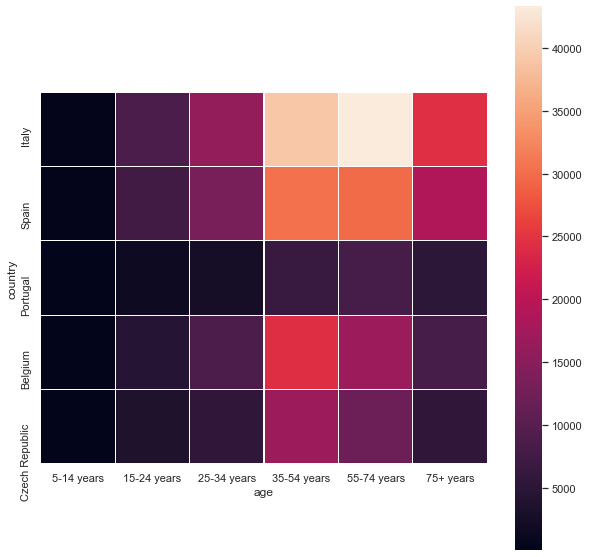

In [532]:
plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3);

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas variables porque no se va a ver bien. Hazlo por partes.

In [533]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


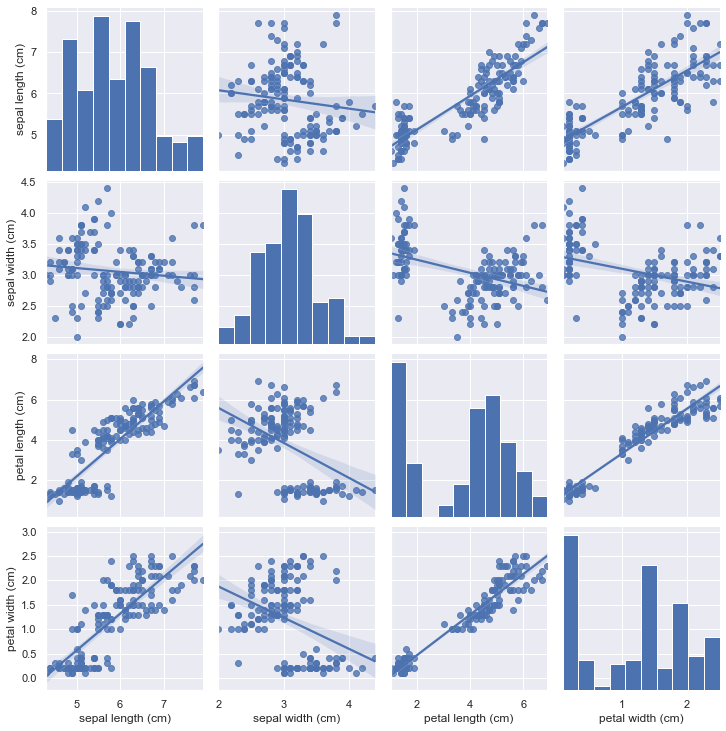

In [534]:
sns.pairplot(iris_df,
            kind='reg'
            )

In [537]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


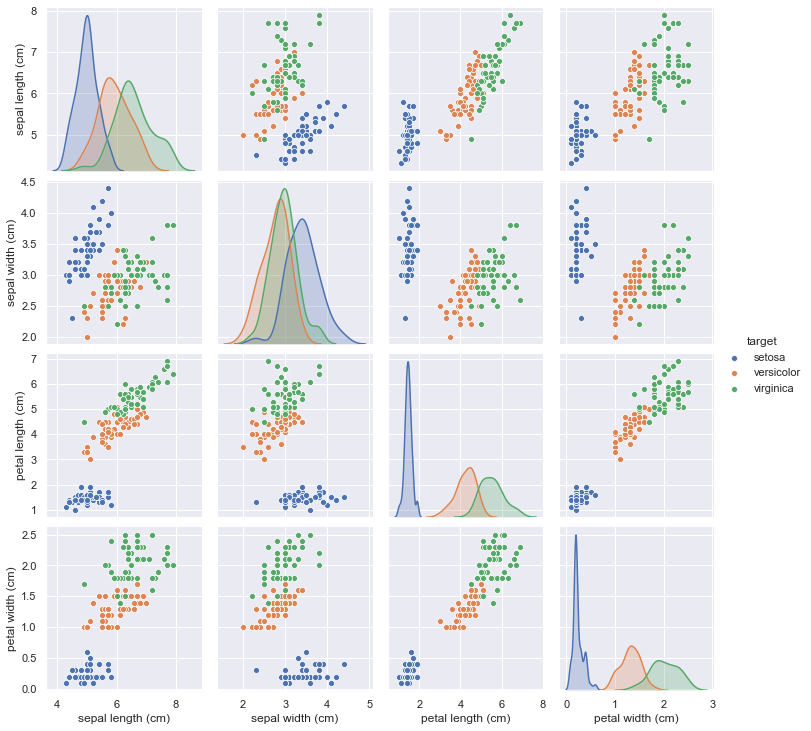

In [536]:
sns.pairplot(iris_df,
            kind='scatter',
            hue='target'
            );

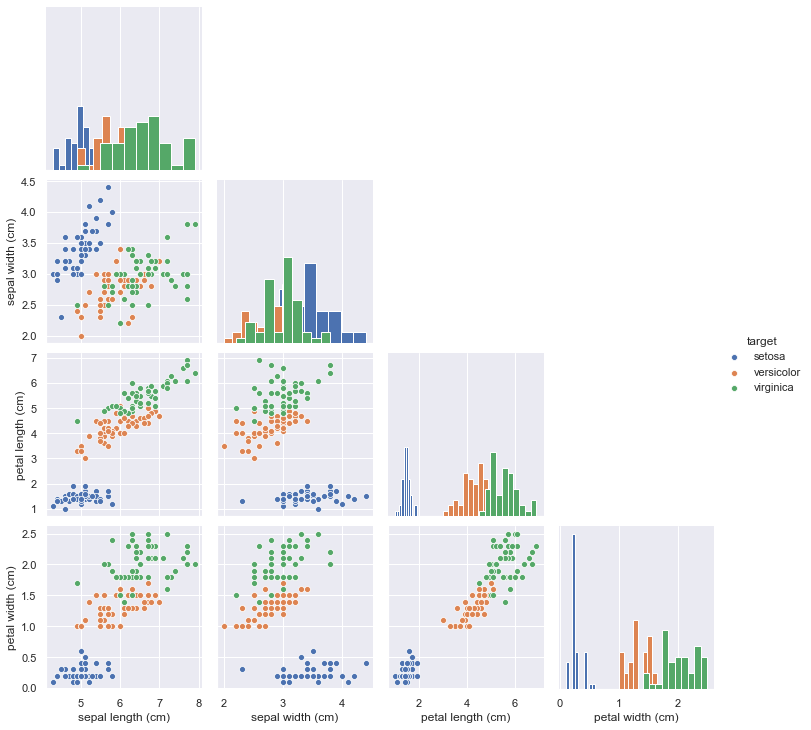

In [540]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="target",
             diag_kind="hist",
             corner = True
            );

### EJERCICIOS

1. Examina el dataframe de las ventas (``market_df``) y representa, con un mapa de calor, las correlaciones entre las variables numéricas.

2. Con ese mismo dataframe, toma las variables ``'Rating', 'Total', 'gross income', 'gross margin percentage' y 'Customer type'``, y representa su relación mediante un correlograma, donde la variable cualitativa será la que se utilice para representar el color de las comparaciones entre sí de las otras 4. ¿Se corresponde con lo que has visto en el apartado anterior?

In [542]:
market_df[['Rating', 'Total', 'gross income', 'gross margin percentage', 'Customer type']].corr()

,Rating,Total,gross income,gross margin percentage
Rating,1.000000e+00,-3.644170e-02,-3.644170e-02,2.042714e-15
Total,-3.644170e-02,1.000000e+00,1.000000e+00,2.408632e-16
gross income,-3.644170e-02,1.000000e+00,1.000000e+00,2.461896e-16
gross margin percentage,2.042714e-15,2.408632e-16,2.461896e-16,1.000000e+00


In [544]:
market_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


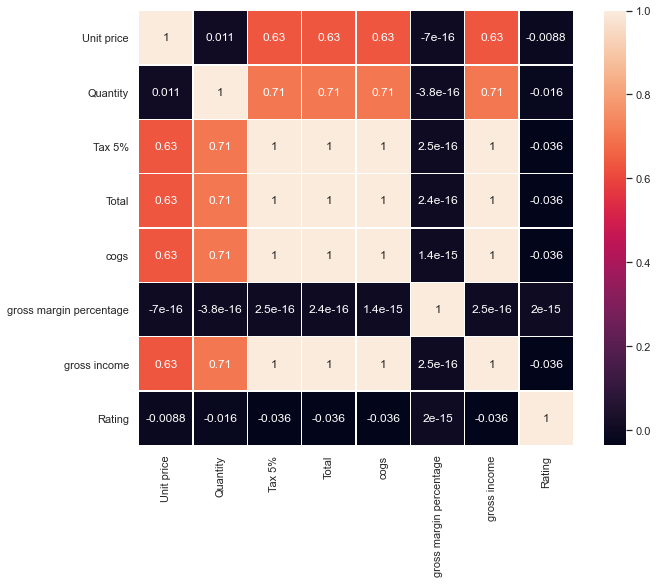

In [546]:
# 1.

f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(market_df.corr(),
           annot=True,
           linewidth=.5,
           square=True);

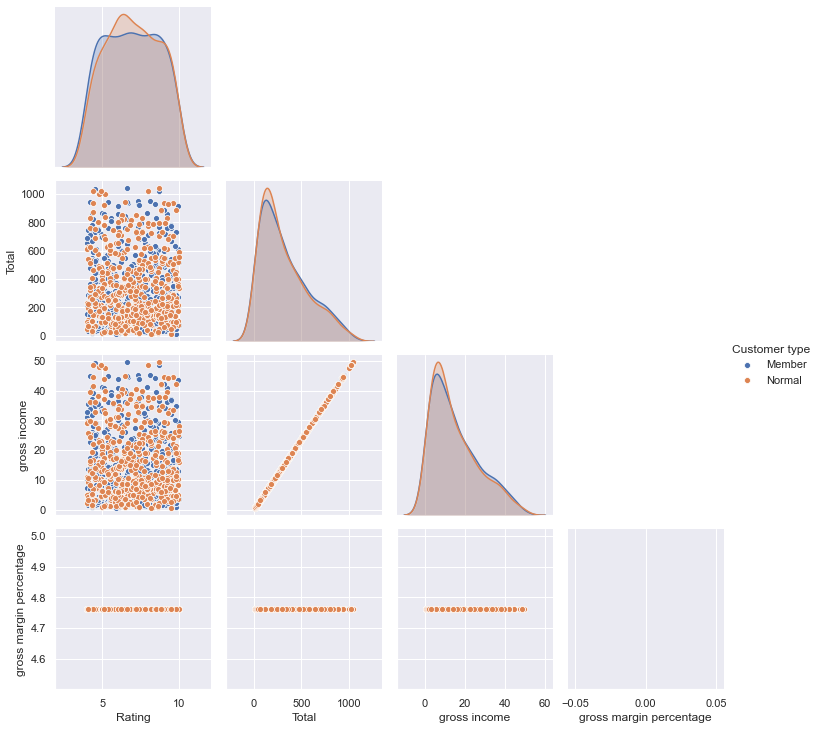

In [548]:
# 2.

market_df3 = market_df[['Rating', 'Total', 'gross income', 'gross margin percentage', 'Customer type']]
sns.pairplot(market_df3,
            kind='scatter',
            hue='Customer type',
            corner = True
            );

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo sería realizar una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [561]:
pd.crosstab(titanic_df['Embarked'], titanic_df['Sex'], margins=False)

Sex,female,male
Embarked,,
C,11,21
Q,7,6
S,37,73


#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se puede mostrar la comparación de dos variables cualitativas (el conteo, que es lo único que podemos hacer con ellas). Los diagramas de barras pueden representarse de 2 formas, principalmente: barras agrupadas (como en este caso) o apiladas (como veremos un poco más adelante).

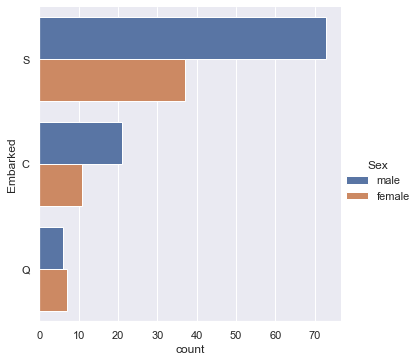

In [551]:
sns.catplot(data=titanic_df,
           y='Embarked',
           hue='Sex',
           kind='count');

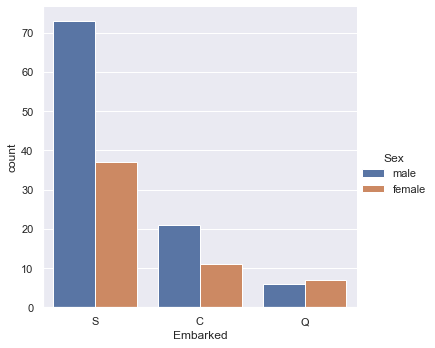

In [552]:
sns.catplot(data=titanic_df,
           x='Embarked',
           hue='Sex',
           kind='count');

También podríamos darle la vuelta:

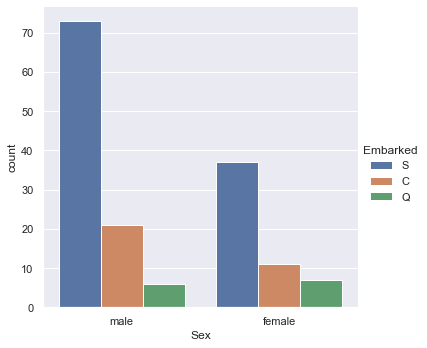

In [553]:
sns.catplot(x="Sex",
            hue='Embarked',
            data=titanic_df,
            kind="count");

Otra manera de visualizar dos o más variables categóricas

<Figure size 2160x720 with 0 Axes>

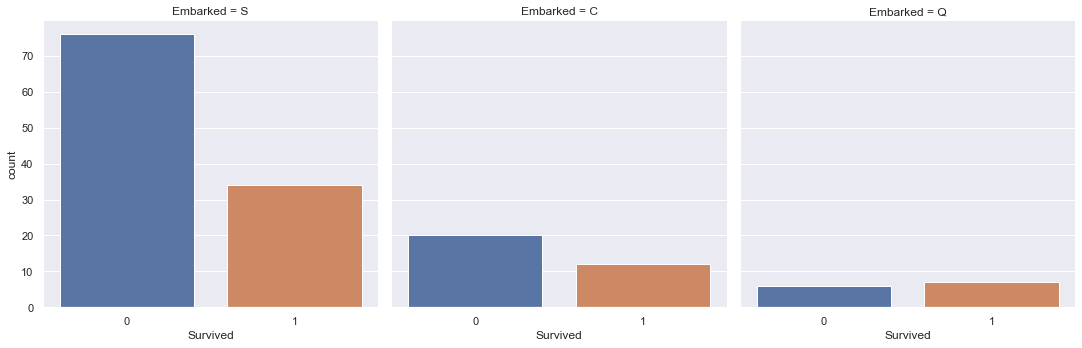

In [570]:
plt.figure(figsize=(30,10));
sns.catplot(x="Survived",
            col="Embarked",
            col_wrap=3,
#             hue='Sex',
            data=titanic_df,
            kind="count");

O podríamos apilarlas:

In [566]:
titanic_df['agg_col'] = 1 # podríamos coger cualquier otra columna que no tuviera nulos, pero de esta forma nos lo aseguramos
df_plot = titanic_df.pivot_table(values='agg_col', columns=['Embarked'], index=['Survived'], aggfunc='count')
df_plot

Embarked,C,Q,S
Survived,,,
0,20,6,76
1,12,7,34


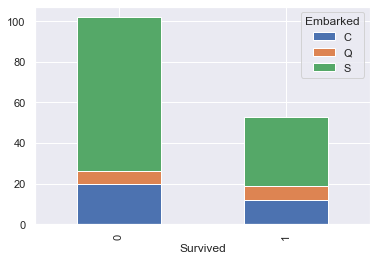

In [567]:
df_plot.plot(kind='bar', stacked=True);

### EJERCICIOS

1. Toma el dataframe de las ventas del mercado y representa, en un diagrama de barras agrupadas de manera horizontal, la relación de las variables 'City' y 'Product line', donde el primero se representará con diferentes colores y el segundo sobre el eje Y.
2. Representa la mismas figuras, pero separándolas en tantas figuras como valores distintos de 'City'

<Figure size 2160x720 with 0 Axes>

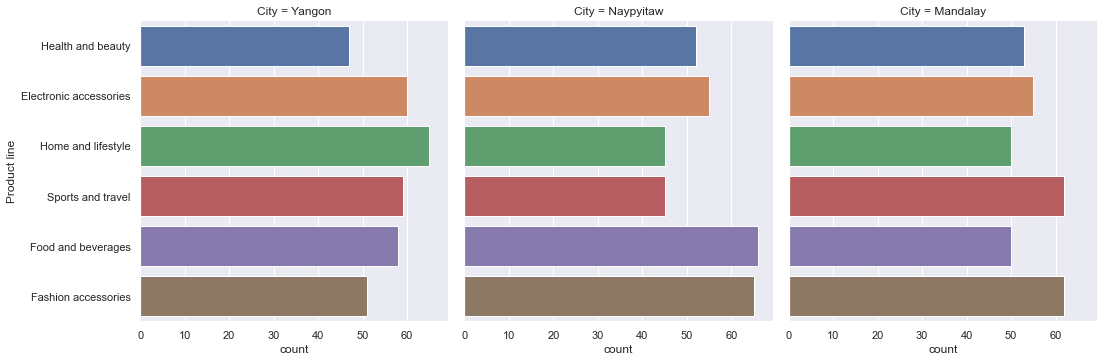

### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [571]:
suicid_df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [572]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]
suicid_df2 = suicid_df2.groupby(['country', 'year']).sum()
suicid_df2.reset_index(inplace=True)

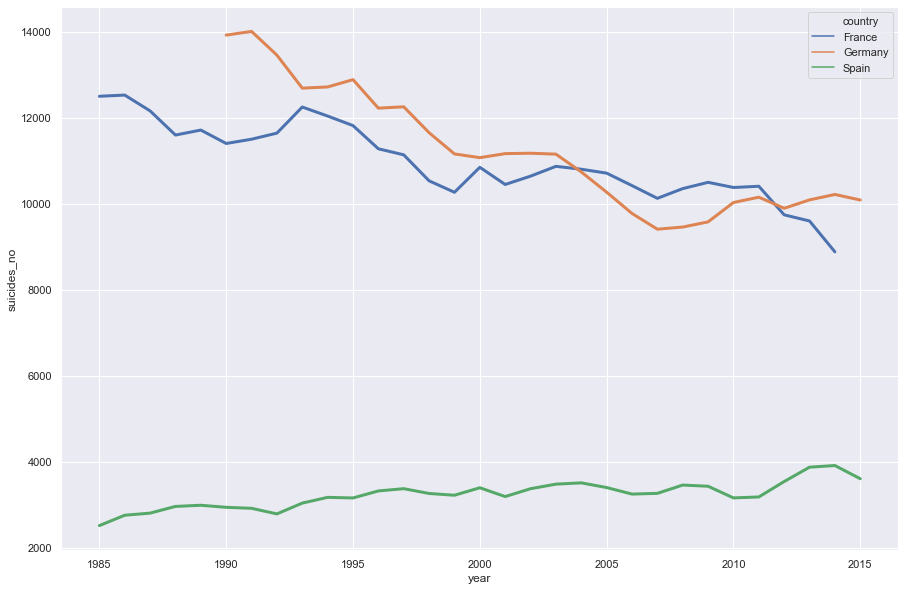

In [573]:
plt.figure(figsize=(15,10))
sns.lineplot(data=suicid_df2,
            x="year",
            y="suicides_no",
            hue="country",
            linewidth=3);

#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [259]:
# !pip install squarify

In [574]:
data

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
country,,,,,,
Italy,400.0,8571.0,16115.0,39250.0,43314.0,24410.0
Spain,354.0,7559.0,13373.0,30331.0,29807.0,18778.0
Portugal,85.0,1505.0,2590.0,6535.0,8189.0,5157.0
Belgium,216.0,4475.0,8731.0,24300.0,16887.0,8152.0
Czech Republic,174.0,3596.0,5498.0,16885.0,12042.0,5492.0


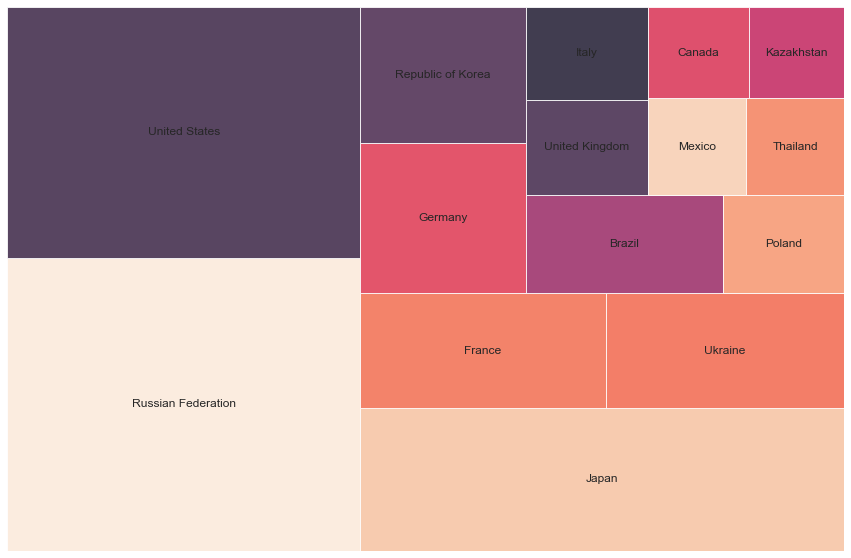

In [575]:
import squarify

data = suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:15]

plt.figure(figsize=(15,10))
squarify.plot(sizes=data.values,
             label=data.index,
             alpha=.8)
plt.axis('off');

Con este catplot obtenemos la dispersión de la variable Age, por cada grupo de la categoría.

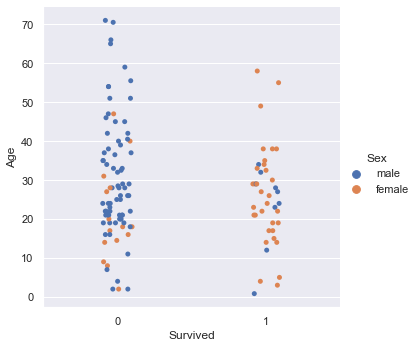

In [263]:
sns.catplot(data=titanic_df,
           x="Survived",
           y='Age',
           hue='Sex')

El equivalente con un diagrama de caja sería el siguiente

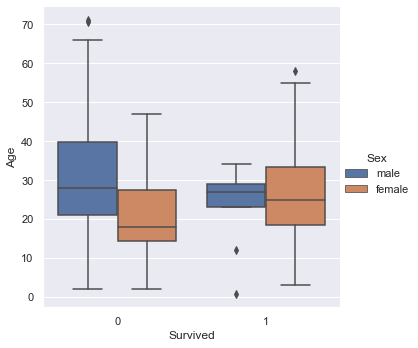

In [264]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df);

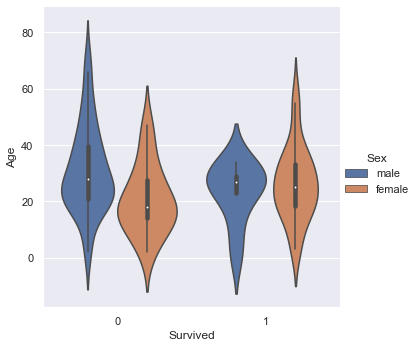

In [266]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

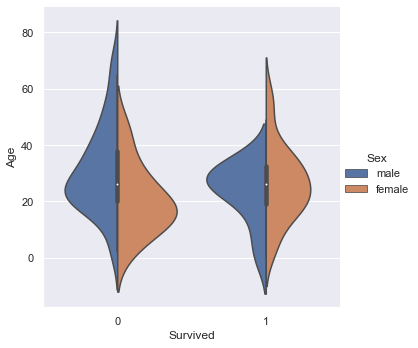

In [270]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split=True, data=titanic_df);

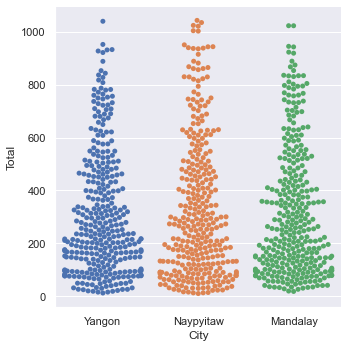

In [277]:
sns.catplot(x="City", y="Total", kind="swarm", data=market_df);

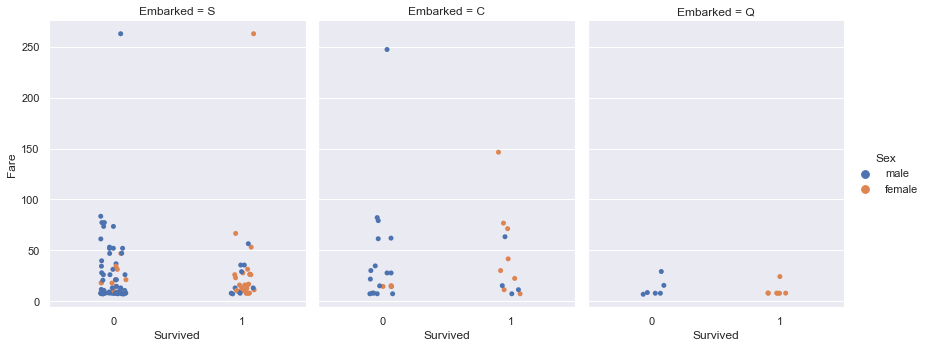

In [278]:
sns.catplot(x="Survived",
            y="Fare",
            hue="Sex",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

In [279]:
suicid_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

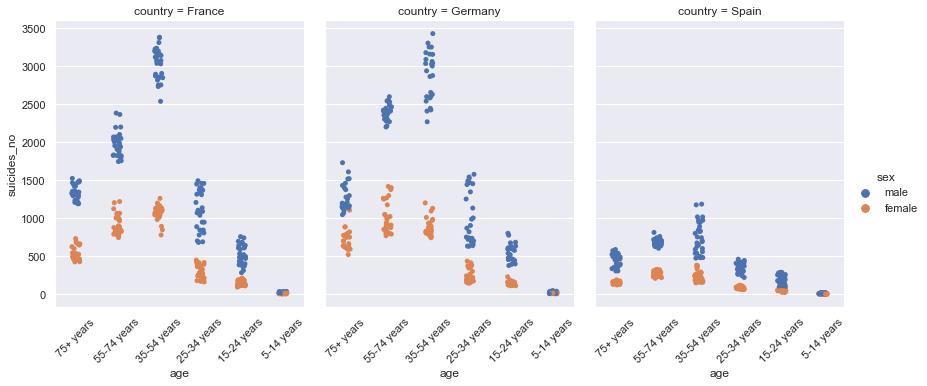

In [284]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]

chart = sns.catplot(x="age",
            y='suicides_no',
            hue="sex",
            col="country",
            data=suicid_df2,
            height=5,
            aspect=.8);
chart.set_xticklabels(rotation=45);

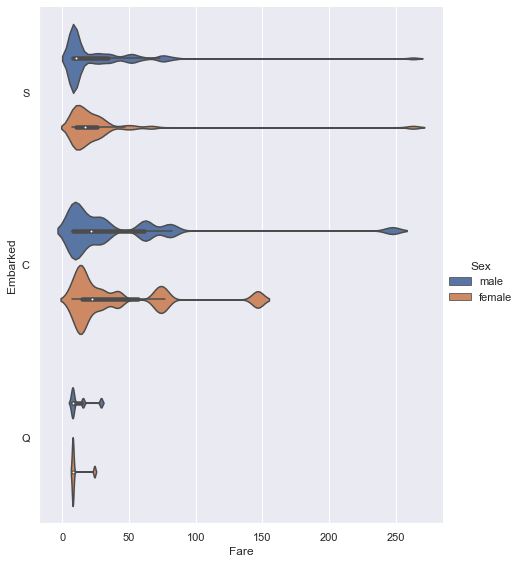

In [286]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            bw=.1,
            height=8,
            aspect=.8,
#            split=True,
            data=titanic_df);

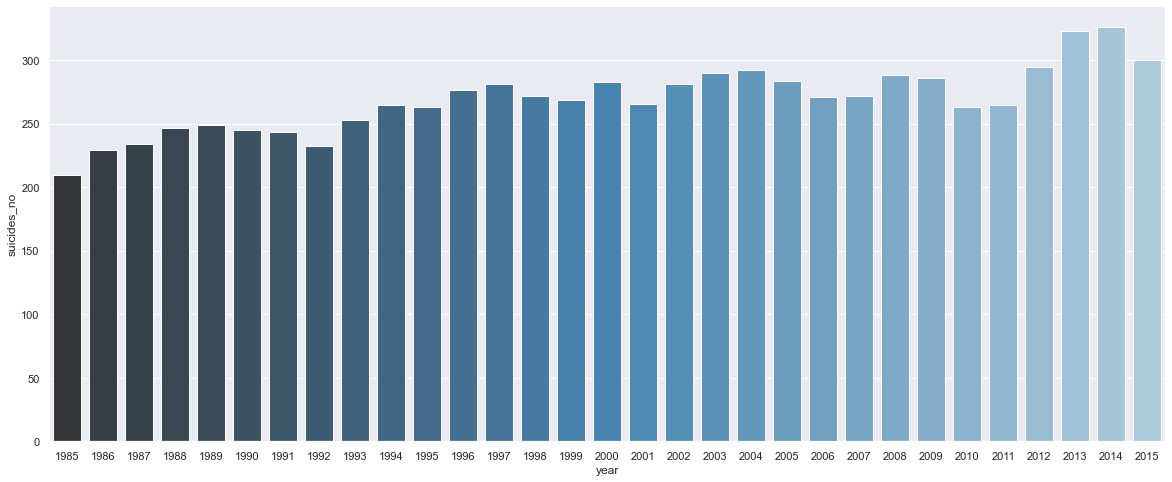

In [293]:
suicid_df2 = suicid_df[suicid_df['country'] == 'Spain']

plt.figure(figsize=(20,8))
sns.barplot(data=suicid_df2,
           x="year",
           y="suicides_no",
           ci=None,
           palette="Blues_d");

In [297]:
suicid_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [310]:
df1 = suicid_df.groupby('country').sum()['suicides_no']
df2 = suicid_df[suicid_df['gdp_per_capita ($)'] > 10000].groupby('country').sum()['suicides_no']
df1 = df1[df1.index.isin(df2.index)]

# gdp es un indicador para saber el nivel de vida del ciudadano medio, con lo cual podremos sacar cómo afecta el nivel de vida a los suicidas
df_tot = pd.DataFrame({"Tot_suicide": df1, "Suicide_gdp": df2}).sort_values("Tot_suicide", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

In [311]:
df_tot

,country,Tot_suicide,Suicide_gdp
0,Russian Federation,1209742,187479
1,United States,1034013,1034013
2,Japan,806902,806902
3,France,329127,329127
4,Germany,291262,291262
5,Republic of Korea,261730,222856
6,Brazil,226613,50690
7,Poland,139098,53853
8,United Kingdom,136805,131700
9,Italy,132060,127301


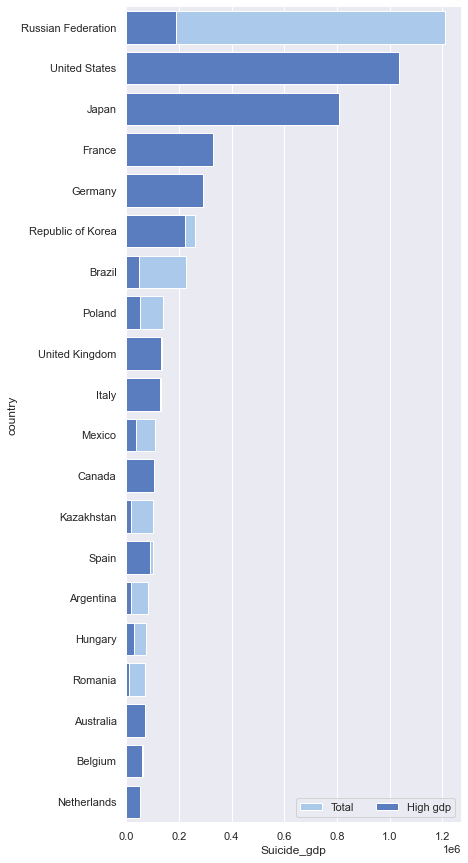

In [312]:
# Creamos figura y ejes:
f, ax = plt.subplots(figsize=(6, 15))

# Suicidios totales
sns.set_color_codes("pastel")
sns.barplot(x="Tot_suicide", y="country", data=df_tot,
            label="Total", color="b")

# Suicidios cuando la situación del país era inferior a cierto umbral
sns.set_color_codes("muted")
sns.barplot(x="Suicide_gdp", y="country", data=df_tot,
            label="High gdp", color="b")

# Añadimos la leyenda
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

### EJERCICIO

1. Toma el dataframe market_df y representa mediante un Treemap la relación entre 'Product line' y 'Total'.

#### 

2. Utiliza de nuevo el dataframe ``market_df`` para crear un gráfico en el que se represente un violín por cada 'Product line', que estará en el eje Y. Cada uno de estos violines deberán de representar la variable cuantitativa 'Total'. Además, se tendrá que tener en cuanta el 'Gender', haciendo que los violines tomen cada una de sus mitades pra la representación de un valor u otro de 'Gender'.

3. Finalmente, vamos a probar ese último gráfico, que puede ser muy útil en diversas situaciones. Utiliza el dataframe del Titanic para:
  1. Elimina aquellos registros que no tengan informado el campo de edad ('Age')
  2. Crea una nueva columna que identifique grupos de los registros en función de la variable 'Age', haciendo estas agrupaciones en rangos de 10 años: [0, 10), [10, 20)..., [70, 80). Esta columna nueva, deberá tener los valores 1, 2..., hasta 8.
  3. Basándote en esa columna nueva, agrupa los registros y obtén otras 2 columnas: una que nos indique el número de pasajeros que cae en cada grupo de edad, y otra que nos diga cuántos de esos pasajeros sobrevivieron, de modo que nos quede un dataframe nuevo con 3 columnas:
    - Grupo de edad
    - Nº de pasajeros en ese rango de edad
    - Nº de supervivientes en ese rango de edad
    
  Tip: Estas 2 nuevas columnas se pueden sacar de diversas maneras, por ejemplo, con un ``groupby`` y una función de agregación bien diseñada; con un ``groupby`` y el método ``transform`` seguido de una función lambda, que nos devolverán 1 registro por cada entrada original; o, quizás más sencillo, haciendo varios ``groupby``, y uniéndolos en base a la columna por la que tienes que hacer los ``groupby`` (grupo_edad)
  
  4. Una vez tengas este nuevo dataframe, realiza un gráfico de barras en el que se muestre, por cada grupo de edad, una barra con el total de pasajeros y, sobre cada una de estas barras, se rellene en otro color cuántos han sobrevivido, lo cual podemos hacer realizando 2 barplots superpuestos, como hemos realizado con anterioridad
  

In [58]:
new_titanic_df = titanic_df.copy()

new_titanic_df = new_titanic_df[new_titanic_df['Age'].notna()]

In [59]:
48//10

4

In [60]:
def agrupa(x):
    salida = (x + 10) // 10
    return salida


In [61]:
new_titanic_df['grupo_edad'] = new_titanic_df['Age'].apply(lambda x: agrupa(x))
new_titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,grupo_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,4.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,6.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,2.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,1.0


In [100]:
new_titanic_df['n_pasajeros'] = new_titanic_df.groupby('grupo_edad')['PassengerId'].transform(lambda x: x.count())
new_titanic_df['n_supervivientes'] = new_titanic_df.groupby('grupo_edad')['Survived'].transform(lambda x: x.sum())
new_titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,grupo_edad,n_pasajeros,n_supervivientes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,3.0,47,16
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,4.0,23,10
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,47,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,4.0,23,10
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,4.0,23,10
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,6.0,8,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,1.0,11,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,3.0,47,16
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,2.0,22,8
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,1.0,11,4


In [76]:
df_survivors = new_titanic_df.groupby('grupo_edad').agg({'Survived': 'sum'}).rename(columns={"Survived": "supervivientes"})
df_pasajeros = new_titanic_df.groupby('grupo_edad').agg({'Survived': 'count'}).rename(columns={"Survived": "n_pasajeros"})


In [88]:
df_join_1 = df_pasajeros.join(df_survivors)
df_join_1.reset_index(drop=False, inplace=True)

In [108]:
df_join_1.dtypes

grupo_edad        float64
n_pasajeros         int64
supervivientes      int64
dtype: object

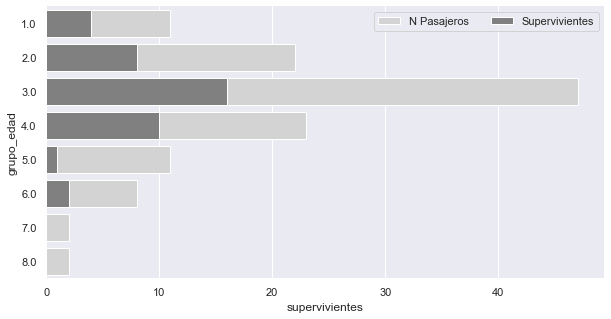

In [107]:
# Creamos figura y ejes:
f, ax = plt.subplots(figsize=(10, 5))

# Suicidios totales
sns.set_color_codes("pastel")
sns.barplot(x="n_pasajeros", y="grupo_edad", data=df_join_1,
            label="N Pasajeros", color="lightgrey", orient='h')

# Suicidios cuando la situación del país era inferior a cierto umbral
sns.set_color_codes("muted")
sns.barplot(x="supervivientes", y="grupo_edad", data=df_join_1,
            label="Supervivientes", color="grey", orient='h')

# Añadimos la leyenda
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)